<a href="https://colab.research.google.com/github/boxfather78/MLAI/blob/main/20230303_MLAI_Formative_Assessment_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='Orange'> 1: Retrieve data for modelling </font> 


In [1]:
# Data stored in a zip file with several folders. 
# A train and Validation Folder each with a folder containing cat images and dog images
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-03-17 18:44:26--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 142.250.128.128, 142.251.6.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   119MB/s    in 0.5s    

2023-03-17 18:44:26 (119 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
# Unzip files to local location

import os
import zipfile

os.getcwd()

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
#Define cat/dog training/test file paths (4 total)

# Code below gives base directory and adds on folder to directory name for each additional directory
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our test dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our tes cat pictures
val_cats_dir = os.path.join(val_dir, 'cats')

val_dogs_dir = os.path.join(val_dir, 'dogs')

In [4]:
#Check Volume of Images (expecting 2k training data and 1k validation data with equal cat/dog images in each)
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(val_cats_dir)))
print('total validation dog images:', len(os.listdir(val_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [5]:
# Check details of first 10 files in each directory
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

val_cat_fnames = os.listdir(val_cats_dir)
print(val_cat_fnames[:10])

val_dog_fnames = os.listdir(val_dogs_dir)
print(val_dog_fnames[:10])

['cat.259.jpg', 'cat.101.jpg', 'cat.92.jpg', 'cat.594.jpg', 'cat.730.jpg', 'cat.355.jpg', 'cat.236.jpg', 'cat.836.jpg', 'cat.130.jpg', 'cat.752.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
['cat.2167.jpg', 'cat.2221.jpg', 'cat.2238.jpg', 'cat.2175.jpg', 'cat.2260.jpg', 'cat.2344.jpg', 'cat.2361.jpg', 'cat.2330.jpg', 'cat.2000.jpg', 'cat.2196.jpg']
['dog.2182.jpg', 'dog.2266.jpg', 'dog.2342.jpg', 'dog.2016.jpg', 'dog.2368.jpg', 'dog.2263.jpg', 'dog.2165.jpg', 'dog.2275.jpg', 'dog.2105.jpg', 'dog.2287.jpg']


A convolutional neural network as a neural network in which at least one layer is a convolutional layer. In practice, a convolutional layer is one that contains convolutional operations, being the term for element-wise multiplication of a convolutional filter (of size defined by programmer) and a slice of the input matrix (in our case cat/dog images), which must be larger than the convolutional filter grid. This is then followed by summing the values of each filter to create a smaller grid. (Google, n.d.)

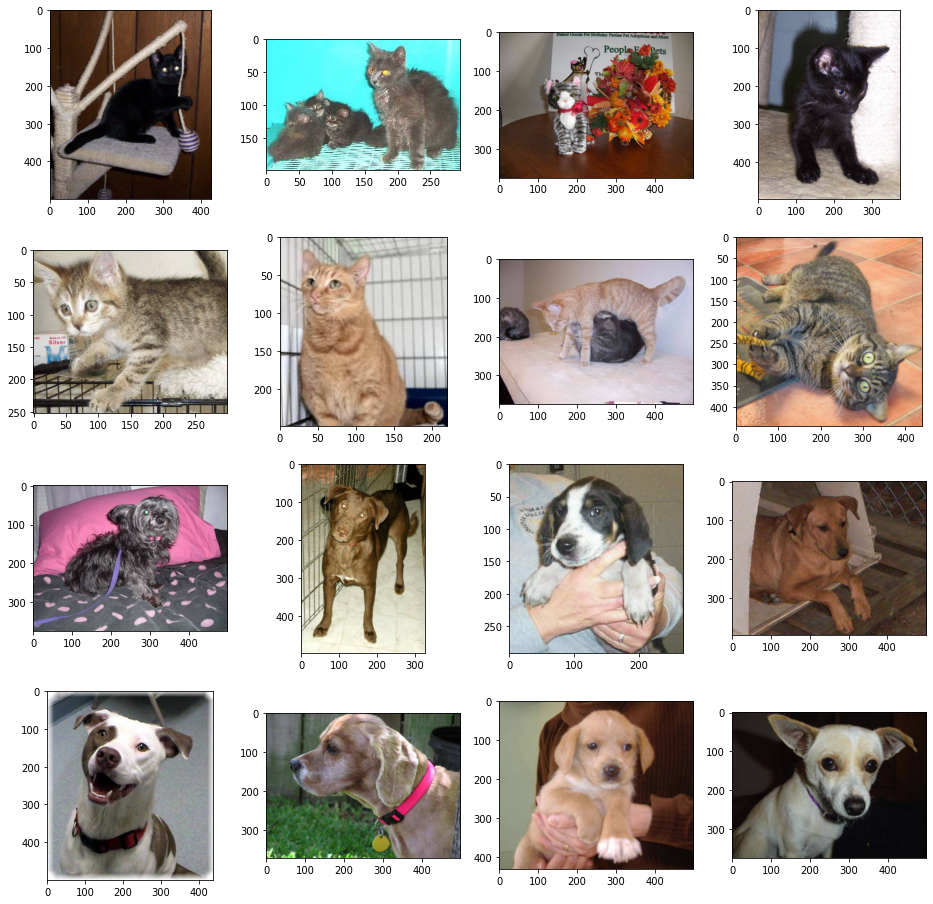

In [6]:
# Use matplotlib to iterate over first 8 images from each train directory and show
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(16,16)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(4, 4, i + 1)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# <font color='Orange'> 2: Data Preprocessing </font>

The Keras pre-processing ImageDataGenerator function allows me to import and adjust data as it flows into my train and validation inputs. Importing and adjusting images in batches reduces the memory required for the task.
[reference](https://https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720)  [reference](https://https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

I need to normalise data for neural networks to make things easier (citation). As my images are in colour, represented by 3 numbers between 0-255 across Red, Green and Blue spectrums, I will normalise this to 0-1 simply by dividing by 255, using the rescale parameter. 

To load my data as inputs to my CNN, I can use the  flow_from_directory command. This loads both data, and the label (taken from the parent folder in which the image sits - hence the importance of putting data in the correct folder structure). This can later be used with Keras model methods that accept data generators as inputs.

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalise RGB values (0-255 scale) in Train and Test datasets by dividing by 255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255) 

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images defined above
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        shuffle=True, #Randomly sort the images
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow test images in batches of 20 using test_datagen generator
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        shuffle = False, #We don't want to randomly sort these as we will keep the order to compare vs. predictions
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#<font color='Orange'> 3: First CNN </font>

## <font color='Blue'> 3.1: Architecture </font>

### Input layer
First, I am ensuring that the input shape can be understood using Keras. This represents the number of elements my array has in each direction. Here it is 150x150x3 based on the image width, height and colour matrix. This means that for each image there are 67,500 elements to analyse. This becomes 135m across the full dataset, multiplied further by the number of feature maps in the first convolutional layer. 

### Convolutional layers
Processing these volumes will need a lot of computational power so we need to start building layers with a small number of feature maps, but can increase these as we shrink the images through maxpooling layers. The convolutional layers look to reduce the volume of information presented to the model without losing too much richness from the datasets. It does this by passing a filter over each layer of each image (Red, Green and Blue hues) to look for specific 'features', creating 3 feature maps for each image and for each filter. 

Each element in the convolutional layer is passed through the reLu **activation** function, which will help us find non-linear relationships in the data by keeping the details with the strongest characteristics. 

### Pooling
Each convolution is followed by a pooling layer which reduces 4 pixels down to one and aims to avoid model overfitting by keeping the most vivid detail from each part of an image, taking this onward to the next convolutional layer. [citation](https://wandb.ai/ayush-thakur/dl-question-bank/reports/Keras-Layer-Input-Explanation-With-Code-Samples--VmlldzoyMDIzMDU)

### Filter parameters
Based on a configuration used widely for classifying images, I will create three layers each containing convolution, reLu and maxpool (citation). Since the image size is 150x150, the initial convolutional filter will be a standard 3x3 window with a single stride and no padding. My maxpool layer will be 2x2, helping to reduce the volume of activations from the previous layer and reduce model overfitting. 

My first convolution extracts 16 filters, followed by 32, with the last one extracting 64 filters. As each image reduces in size, the network will need less computational power, hence a higher number of filters can be accommodated, which gives me a greater chance of building feature maps that pick out important aspects of each image ([citation](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)).

### Fully connected layers
I need to flatten the output into a one-dimensional vector to feed into my fully connected layer, which will have 512 hidden units, followed by another activation function to produce a final set of outputs. By now, the flattered image size is 18,496, so I can have one fully connected layer with 512 hidden units, resulting in 9.47m neurons. 

Finally, a Sigmoid **activation** is needed so that the output of our network will be a single value between 0 and 1, helping us understand if the prediction is closer to one class or the other.

In [8]:
from tensorflow.keras import layers
from tensorflow.keras import Model


In [10]:
# Here I am programming the chosen CNN architecture
# 150x150x3 should be used to represent input feature map
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3 followed by max-pooling layer with a 2x2 window
# The stride refers to the number of pixels moved by the filter, while 'valid' padding means no white space will
# be added, hence the image will decrease in size. Both stride and padding values are default, so are shown
# here for demonstration purposes only.
x = layers.Conv2D(16, 3, activation='relu', strides=(1), padding='valid')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3 followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3 followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

#  Output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
model = Model(img_input, output)


The table below summarises my model architecture, showing how the initial input shape decreases in size through max-pooling and padding, while the number of feature maps increases based on the number of filters used at each stage.

In [11]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        1849

## <font color='Blue'> 3.2: Hyperparameters </font>

**Activation Function**
As mentioned, I am using ReLu activation for my convolution layers as this will help discover non-linear relationships in the data. I am using Sigmoid as the final activation function as this is a binary classification problem. 

**Loss Function**
I will train the model using binary_crossentropy loss, since this is a binary challenge.

**Loss Optimiser**
I will use the Adam loss optimiser as this adjusts the learning rate dynamically based on the history of gradient descent, helping us get to the lowest loss number faster. 

**Learning Rate** 
An initial learning rate of 0.001 will drive a reasonable pace of convergence towards the optimal loss.

**Evaluation Metric**
During training, I will monitor classification accuracy and afterwards validate where the model performs well using a confusion matrix.

**Epochs**
I will initially use 10 epochs so that the initial build and assessment doesn't take too long.
 
**Drop-out for regularisation**
I will begin without a dropout, which randomly replaces the value of some neurons with zero to try and stimulate more generalised networks. I will first see how this architecture performs.

In [12]:
# Compile the model with specified loss, loss optimiser and evaluation metric
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

In [13]:
# Train the model by loading all 2000 images in batches, using the validation data to check generalisation.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images / batch_size (20) = steps
      epochs=10,
      validation_data=val_generator,
      validation_steps=50,  # 1000 images / batch_size (20) = steps
      verbose=2) # show detail as one line per epoch

<ipython-input-13-f9ba0b5009c7>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
100/100 - 22s - loss: 0.7232 - acc: 0.5490 - val_loss: 0.6487 - val_acc: 0.6070 - 22s/epoch - 222ms/step
Epoch 2/10
100/100 - 11s - loss: 0.6687 - acc: 0.5970 - val_loss: 0.6367 - val_acc: 0.6370 - 11s/epoch - 107ms/step
Epoch 3/10
100/100 - 8s - loss: 0.5873 - acc: 0.6920 - val_loss: 0.5792 - val_acc: 0.7060 - 8s/epoch - 81ms/step
Epoch 4/10
100/100 - 9s - loss: 0.5011 - acc: 0.7610 - val_loss: 0.5769 - val_acc: 0.6870 - 9s/epoch - 94ms/step
Epoch 5/10
100/100 - 9s - loss: 0.4175 - acc: 0.8140 - val_loss: 0.5863 - val_acc: 0.7140 - 9s/epoch - 90ms/step
Epoch 6/10
100/100 - 10s - loss: 0.3472 - acc: 0.8350 - val_loss: 0.7115 - val_acc: 0.6900 - 10s/epoch - 98ms/step
Epoch 7/10
100/100 - 8s - loss: 0.2326 - acc: 0.8970 - val_loss: 0.7538 - val_acc: 0.6980 - 8s/epoch - 82ms/step
Epoch 8/10
100/100 - 9s - loss: 0.1275 - acc: 0.9540 - val_loss: 0.9802 - val_acc: 0.7170 - 9s/epoch - 90ms/step
Epoch 9/10
100/100 - 9s - loss: 0.0737 - acc: 0.9755 - val_loss: 1.1973 - val_acc: 0.707

## <font color='Blue'> 3.3: Evaluation</font>
Based on the outcomes above, the model does a great job of minimising loss on the train dataset with 0.047 binary cross-entropy loss and 98%. However, the model is overfitted as it does not generalise well on the validation dataset, evidenced by a low accuracy on the validation set. 

The overfitting can be seen visually in the charts below, which shows the loss value by epoch. The train and validation losses deviate from the third epoch onwards, while the validation loss starts to rise after the fourth epoch, suggesting that adding more epochs won't help.

This overfitting may be occuring because 2000 isn't a huge amount of data to learn from. Our model is picking out and focusing on features in the training set that aren't present in the validation set (e.g. a human hand or a chair).

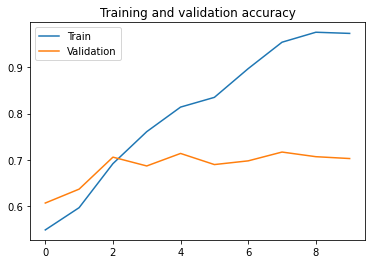

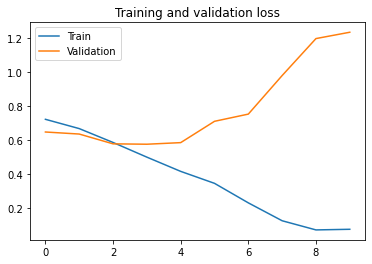

In [15]:
### Charting the loss and accuracy by epoch ###
# Create list of Loss and Accuracy results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Number of epochs

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.gca().legend(('Train','Validation'))

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.gca().legend(('Train','Validation'))


<ipython-input-23-d9a713c8ac68>:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(val_generator)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and

              precision    recall  f1-score   support

        cats       0.50      1.00      0.67       500
        dogs       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



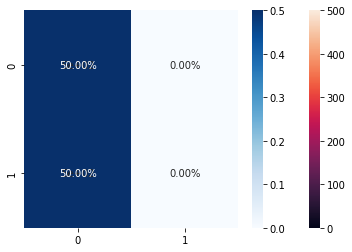

In [23]:
# Show confusion matrix & classification report
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

preds = model.predict_generator(val_generator)
pred_classes = np.argmax(preds, axis=1)
true_classes = val_generator.classes
class_names = list(val_generator.class_indices.keys())

class_rep = classification_report(true_classes, pred_classes, target_names=class_names)
conf_mat = confusion_matrix(true_classes, pred_classes)

sns.heatmap(conf_mat, annot=True)
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, 
            fmt='.2%', cmap='Blues')

print(class_rep)


The CNN appears to have labelled everything as a cat (0) which means that it is not able to distinguish the different features that identify a dog vs. a cat. While input augmentation in the next step is likely to help with this, I will also go back and try some different CNN architectures and increase the volume of feature maps used in early convolutional layers. I have a feeling that I am losing important information in the image too quickly meaning later layers of the model are adding little.

I'm keen to have a better baseline for the later stages of this assessment to beat, so will work on this section more for the summative.

# <font color='Orange'> 4: Second CNN </font>

## <font color='Blue'> 4.1: Preventing overfitting using data augmentation

Similar to traditional machine learning, there are ways to prevent overfitting of a model, that is making a model more capable of correctly classifying new shapes or images. 

I've already used drop-out and maxpooling to attempt to avoid overfitting, but another good way to combat overfitting is to increase the sample size or augment the data.

Image data can be augmented by transforming each image randomly. Zooming, flipping, rotating and cropping images are all augmentation methods that be applied to individual images randomly. By loading these in batches, my model is built using different images, helping it to recognise more different features in the images.

In [24]:
# Setting up a generator that randomly adjusts each image according to parameters below
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=60, # degrees of rotation is up to 60
      width_shift_range=0.25, # shifts image by up to 25% left or right horizontally
      height_shift_range=0.25, # shifts image vertically
      brightness_range=(0.5, 1.5), # multiplies pixel value by range between the two numbers shown
      shear_range=0.2, # moves bottom of picture horizontally by up to 20%
      zoom_range=0.2, # zooms into picture by up to 20%
      horizontal_flip=True, # randomly flips image horizontally
      vertical_flip=False, # in this case we won't flip vertically as we don't need to recognise upside down images
      fill_mode='nearest') # fills any new pixels created by above operations with value of nearest pixel

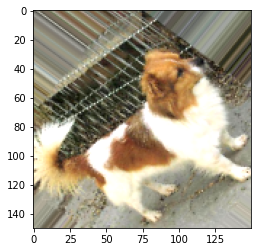

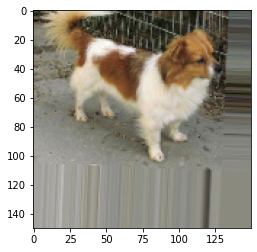

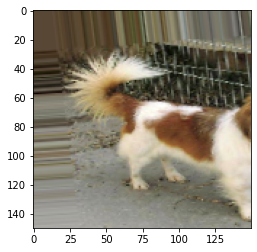

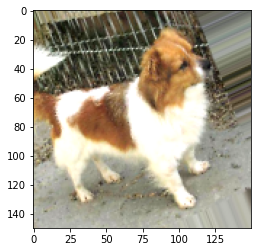

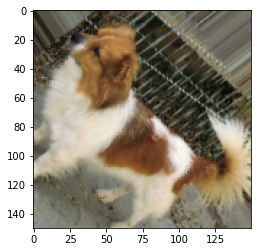

In [25]:
# Show random selection of augmented dogs
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

rand_index = np.random.randint(0, len(train_dog_fnames)) # choose random image number

img_path = os.path.join(train_dogs_dir, train_dog_fnames[rand_index])
img = load_img(img_path, target_size=(150, 150)) 
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Generates batches of randomly transformed images until i = j
i = 0
j = 5
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(array_to_img(batch[0]))
  i += 1
  if i == j:
    break

Now I can see that the augmentation is working, I will apply the same parameters to the training dataset, remembering to scale the RGB range. I will leave the validation dataset as it is, since we wouldn't expect to see augmented images presented for classification in the real world.

Data augmentation is one example of feature transference in that the increase in the size and variety of the training dataset should enable me to create a model that is trained to generalise better to new images. (citation required)


In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60, # degrees of rotation is up to 60
    width_shift_range=0.25, # shifts image by up to 25% left or right horizontally
    height_shift_range=0.25, # shifts image vertically
    brightness_range=(0.5, 1.5), # multiplies pixel value by range between the two numbers shown
    shear_range=0.2, # moves bottom of picture horizontally by up to 20%
    zoom_range=0.2, # zooms into picture by up to 20%
    horizontal_flip=True, # randomly flips image horizontally
    vertical_flip=False, # in this case we won't flip vertically as we don't need to recognise upside down images
    fill_mode='nearest') # fills any new pixels created by above operations with value of nearest pixel

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

# Flow validation images in batches of 32 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## <font color='Blue'>4.2: Architecture

I will now train a new CNN using the same architecture as previously so that I have a good measure of the impact of image augmentation.


In [27]:
# Recreating original CNN architecture (not sure I need to do this...)
img_input = layers.Input(shape=(150, 150, 3))

x = layers.Conv2D(16, 3, activation='relu', strides=(1), padding='valid')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.2)(x)

output = layers.Dense(1, activation='sigmoid')(x)

# Create model
model = Model(img_input, output)

# Compile model with same parameters
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

In [28]:
# Train model with same parameters
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=val_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/10


<ipython-input-28-2c181d3eabd3>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 - 25s - loss: 0.7203 - acc: 0.5050 - val_loss: 0.6879 - val_acc: 0.6060 - 25s/epoch - 249ms/step
Epoch 2/10
100/100 - 20s - loss: 0.6923 - acc: 0.5270 - val_loss: 0.6709 - val_acc: 0.5440 - 20s/epoch - 204ms/step
Epoch 3/10
100/100 - 24s - loss: 0.6826 - acc: 0.5660 - val_loss: 0.6491 - val_acc: 0.6310 - 24s/epoch - 244ms/step
Epoch 4/10
100/100 - 21s - loss: 0.6700 - acc: 0.5740 - val_loss: 0.6368 - val_acc: 0.6270 - 21s/epoch - 211ms/step
Epoch 5/10
100/100 - 21s - loss: 0.6691 - acc: 0.5935 - val_loss: 0.6735 - val_acc: 0.5580 - 21s/epoch - 208ms/step
Epoch 6/10
100/100 - 20s - loss: 0.6615 - acc: 0.5900 - val_loss: 0.6317 - val_acc: 0.6390 - 20s/epoch - 198ms/step
Epoch 7/10
100/100 - 19s - loss: 0.6667 - acc: 0.6010 - val_loss: 0.6137 - val_acc: 0.6520 - 19s/epoch - 189ms/step
Epoch 8/10
100/100 - 20s - loss: 0.6320 - acc: 0.6335 - val_loss: 0.6110 - val_acc: 0.6720 - 20s/epoch - 201ms/step
Epoch 9/10
100/100 - 21s - loss: 0.6436 - acc: 0.6145 - val_loss: 0.6000 - val_acc:

## <font color='Blue'>4.3: Evaluation

Based on the loss and accuracy figures above, the model is now doing a better job of generalising as the accuracy and loss metrics are similar across both training and validation. There is a bit of choppiness in these scores as epochs are added, so I would also consider adding epochs to see if things improve.
 

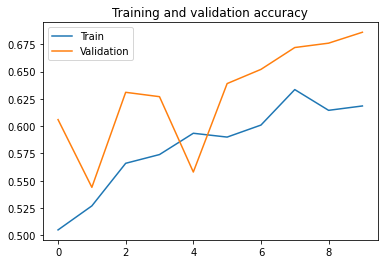

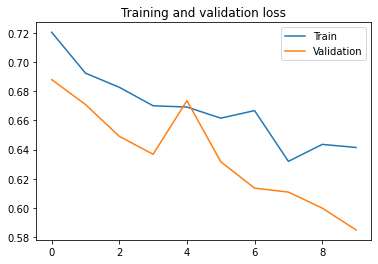

In [29]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.gca().legend(('Train','Validation'))

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.gca().legend(('Train','Validation'))

<ipython-input-30-b4f89714f508>:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(val_generator)
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and

[[500   0]
 [500   0]]               precision    recall  f1-score   support

        cats       0.50      1.00      0.67       500
        dogs       0.00      0.00      0.00       500

    accuracy                           0.50      1000
   macro avg       0.25      0.50      0.33      1000
weighted avg       0.25      0.50      0.33      1000



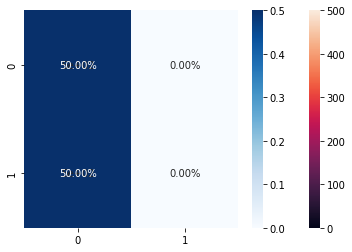

In [30]:
# Show confusion matrix & classification report
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict_generator(val_generator)
pred_classes = np.argmax(preds, axis=1)
true_classes = val_generator.classes
class_names = list(val_generator.class_indices.keys())

class_rep = classification_report(true_classes, pred_classes, target_names=class_names)
conf_mat = confusion_matrix(true_classes, pred_classes)

sns.heatmap(conf_mat, annot=True)
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, 
            fmt='.2%', cmap='Blues')

print(class_rep)

Once again my CNN thinks everything is a cat! I think I can resolve this part by going back and looking at the original CNN architecture and trying a simpler approach.  

Once complete, I can look to improve this further by adjusting some of the hyperparameters that were discussed in 3.2. This can be done through Hyperparameter Optimisation, which is what I will try next.

#<font color='Orange'> 5: Third CNN

## <font color='Blue'> 5.1: Hyperparameter Optimisation using GridSearch

## <font color='Blue'> 5.2: Architecture

## <font color='Blue'> 5.3: Evaluation

#<font color='Orange'> 6: Fourth CNN

## <font color='Blue'> 6.1: Pre-trained architectures

## <font color='Blue'> 6.2: Architecture

## <font color='Blue'> 6.3: Evaluation

#<font color='Orange'> 7: Summary/Conclusion

#<font color='Orange'> References